# **Phishing URL detection: clustering real dataset**

**RQ1:** What characteristics provide the greatest discriminatory information for identifying phishing sites compared to legitimate ones?  

**RQ2:** Do synthetic data generated by Large Language Models preserve the same statistical properties as real data?

**RQ3:** What are the main differences between synthetic data generated by LLMs and real data in regression and clustering contexts?

**RQ4:** Can the features generated by LLMs be mapped to known statistical distributions?

<br>

**Author:** Raffaele Aurucci

## **Reading filtered dataset**

In [24]:
download.file("https://drive.google.com/uc?id=1Hq5AkkiOBiPLmPMEzLbgPj83Hs_lzUnY&export=download", "Phishing_URL_Dataset_3_Filtered.csv")

In [25]:
df <- read.csv('Phishing_URL_Dataset_3_Filtered.csv', sep = ",")

In [26]:
str(df)

'data.frame':	20153 obs. of  21 variables:
 $ URLLength            : int  462 379 285 437 22 221 318 397 21 473 ...
 $ DomainLength         : int  14 14 14 14 14 11 11 13 13 13 ...
 $ TLDEncoding          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ NoOfLettersInURL     : int  298 227 171 152 0 145 201 245 0 307 ...
 $ NoOfDegitsInURL      : int  87 81 54 264 11 29 58 88 10 100 ...
 $ NoOfSpecialCharsInURL: int  54 48 37 14 4 24 36 57 4 59 ...
 $ IsHTTPS              : int  1 1 1 0 0 1 1 0 0 1 ...
 $ LineOfCode           : int  2 2 11 242 17 11 2 2 11 125 ...
 $ LargestLineLength    : int  1638 1638 564 446 234 493 1638 1638 257 52977 ...
 $ HasTitle             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NoOfReference        : int  0 0 1 1 2 1 0 0 1 7 ...
 $ DomainTitleMatchScore: num  0 0 0 0 0 0 0 0 0 0 ...
 $ URLTitleMatchScore   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ HasFavicon           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Robots               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ IsResponsive         : int  1 1

In [27]:
set.seed(42)

In [28]:
if (!require(ggplot2)) install.packages('ggplot2')
library(ggplot2)

Loading required package: ggplot2



## **Distance Matrix**

In [29]:
if(!require(cluster)) install.packages('cluster')

library(cluster)

### Z-score normalization

In [30]:
df_X <- df[, -ncol(df)]

# Exclude binary features to the scaling
exclude_columns <- c(7, 10, 14, 15, 16, 18, 19, 20)

df_to_scale <- df_X[, -exclude_columns]

df_scaled <- scale(df_to_scale)

# Combined binary and continuous fratures
df_normalized <- cbind(df_scaled, df_X[, exclude_columns])

# Converting in data frame
df_X <- as.data.frame(df_normalized)

The **Gower Method** is a technique used to compute the distance matrix of a dataset, which can handle mixed types of variables (e.g., numerical and categorical data).

In [31]:
# Convert in factors binary features
df_X[c(13:20)] <- lapply(df_X[c(13:20)], as.factor)

# Compute distance matrix with 'gower' method
distance_matrix <- daisy(df_X, metric = "gower")

## **Total Non-Homogeneity Matrix**

### The statistical measure of heterogeneity (**trace**) is calculated to assess how homogeneous the data are.

In [32]:
# Substitue factors in numeric features
df_X[c(13:20)] <- df[, c(7, 10, 14, 15, 16, 18, 19, 20)]

# Variance/covariance matrix
WI <- cov(df_X)

n <- nrow(df_X)

# Non-Homogeneity Matrix
HI <- (n-1)*WI

trHI <- sum(diag(HI))
trHI

[1] 275793.6

## **Hierarchical Clustering: Complete Linkage**

In [ ]:
hls <- hclust(distance_matrix, method = "complete")
str(hls)

List of 7
 $ merge      : int [1:20152, 1:2] -95 -18820 -18824 -121 -483 -122 -123 -325 -137 -530 ...
 $ height     : num [1:20152] 0 0 0 0 0 0 0 0 0 0 ...
 $ order      : int [1:20153] 12453 15216 15139 15140 15192 15183 15214 12439 15151 12320 ...
 $ labels     : NULL
 $ method     : chr "complete"
 $ call       : language hclust(d = distance_matrix, method = "complete")
 $ dist.method: NULL
 - attr(*, "class")= chr "hclust"


### Screeplot

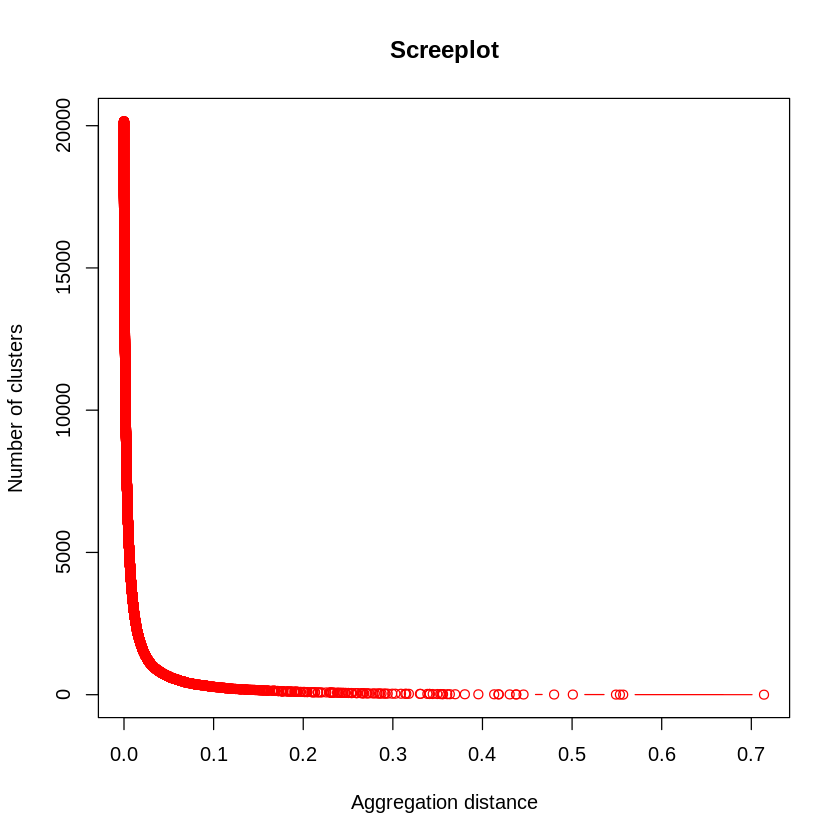

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

plot(c(0, hls$height), seq(20153,1), type = "b", main = "Screeplot",
     xlab = "Aggregation distance", ylab = "Number of clusters",
     col = "red")

### **Cutree:** cut dendograms in two sets

In [ ]:
# Cut dendograms in two sets
cut <- cutree (hls , k = 2, h = NULL)

# Number of elemnts in each cluster
num <- table (cut)

num

cut
    1     2 
 9812 10341 

In [ ]:
# PCA for reduction to 2 dimension
pca <- prcomp(df_X, scale. = FALSE)
data_pca <- pca$x[, 1:2]
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6    PC7
Standard deviation     2.0837 1.4315 1.1835 1.00597 0.98330 0.92153 0.8809
Proportion of Variance 0.3173 0.1497 0.1023 0.07394 0.07065 0.06205 0.0567
Cumulative Proportion  0.3173 0.4670 0.5694 0.64329 0.71394 0.77599 0.8327
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.73732 0.61885 0.57148 0.42843 0.40133 0.38336 0.35632
Proportion of Variance 0.03972 0.02798 0.02386 0.01341 0.01177 0.01074 0.00928
Cumulative Proportion  0.87242 0.90040 0.92426 0.93768 0.94945 0.96018 0.96946
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.32632 0.32019 0.29513 0.27639 0.21001 0.03649
Proportion of Variance 0.00778 0.00749 0.00636 0.00558 0.00322 0.00010
Cumulative Proportion  0.97724 0.98473 0.99110 0.99668 0.99990 1.00000

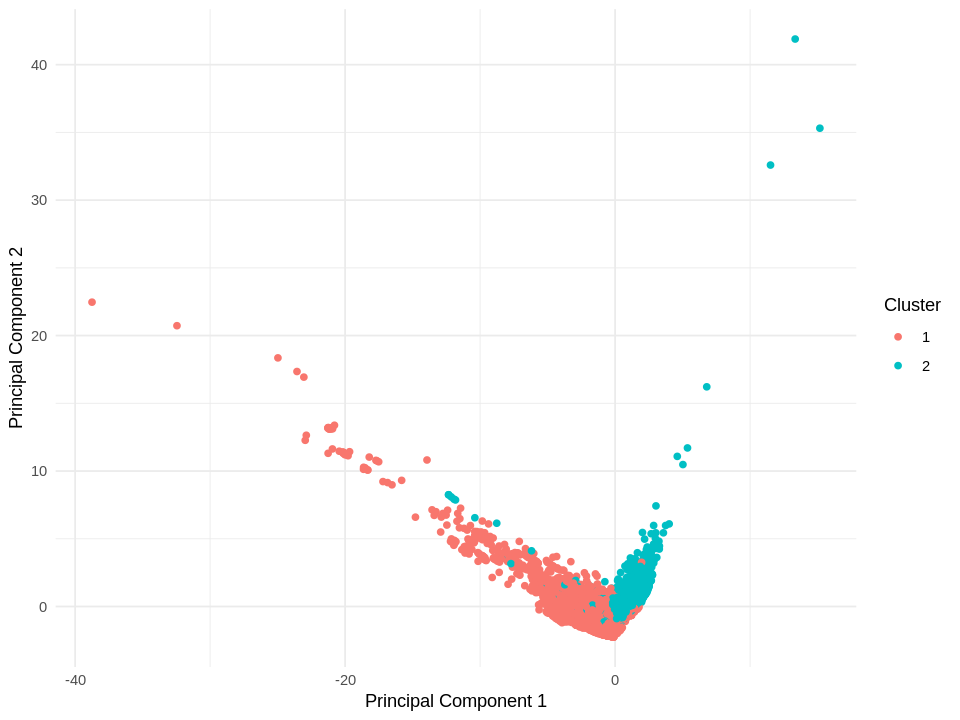

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6)

# Show clusters
plot_df <- data.frame(data_pca, Cluster = factor(cut))
ggplot(plot_df, aes(x = data_pca[,1], y = data_pca[,2], color = Cluster)) +
  geom_point() +
  labs(x = "Principal Component 1", y = "Principal Component 2") +
  theme_minimal()

In [ ]:
# List of labels of clusters
cut_list <- list(cut)

# The sample variance of the data columns is calculated based on cluster labels
agvar <- aggregate(df_X, cut_list, var)[, -1]

# Trace of first cluster
trH1 <-(num [[1]] -1) * sum(agvar [1, ])
if(is.na(trH1))
  trH1 <- 0

# Trace of second cluster
trH2 <-(num [[2]] -1) *sum(agvar [2, ])
if(is.na(trH2))
  trH2 <- 0

# Within
sum <- trH1 + trH2
paste('Within:', sum)

# Between
trB <- trHI - sum
paste('Between', trB/trHI)

[1] "Within: 230714.29804792"

[1] "Between 0.163453061076624"

In [ ]:
# Phishing/Legitimate in each cluster
df_with_cluster <- data.frame(df, Cluster = cut)

cluster_count <- table(df_with_cluster$Cluster, df_with_cluster$label)

colnames(cluster_count) <- c("phishing", "legitimate")

cluster_count

   
    phishing legitimate
  1     9562        250
  2      513       9828

### Silhouette Method

In [ ]:
# List of mean silhouette's coefficients
silhouette_means <- numeric()

for (k in 2:10) {

  cut <- cutree(hls, k = k)

  # Count num of element in each cluster
  num <- table(cut)
  print(num)

  # Silhouette's coefficients
  sil <- silhouette(cut, distance_matrix)

  # Mean silhouette's coefficients
  silhouette_mean <- mean(sil[, 3])
  silhouette_means[k] <- silhouette_mean

  cat("k =", k, "- Silhouette mean:", silhouette_mean, "\n\n")
}

print(silhouette_means[2:10])

cut
    1     2 
 9812 10341 
k = 2 - Silhouette mean: 0.4876214 

cut
   1    2    3 
9812 2541 7800 
k = 3 - Silhouette mean: 0.4196514 

cut
   1    2    3    4 
5650 4162 2541 7800 
k = 4 - Silhouette mean: 0.3044584 

cut
   1    2    3    4    5 
5650 4162   57 2484 7800 
k = 5 - Silhouette mean: 0.2893291 

cut
   1    2    3    4    5    6 
4653 4162  997   57 2484 7800 
k = 6 - Silhouette mean: 0.2926593 

cut
   1    2    3    4    5    6    7 
4653 4162  997   57 2484 7246  554 
k = 7 - Silhouette mean: 0.2058748 

cut
   1    2    3    4    5    6    7    8 
4653 4162  174   57 2484 7246  823  554 
k = 8 - Silhouette mean: 0.200389 

cut
   1    2    3    4    5    6    7    8    9 
3196 4162  174   57 2484 7246  823 1457  554 
k = 9 - Silhouette mean: 0.2472332 

cut
   1    2    3    4    5    6    7    8    9   10 
3196 4162  174   57 2484 1916  823 1457 5330  554 
k = 10 - Silhouette mean: 0.2590894 

[1] 0.4876214 0.4196514 0.3044584 0.2893291 0.2926593 0.2058748 0.200

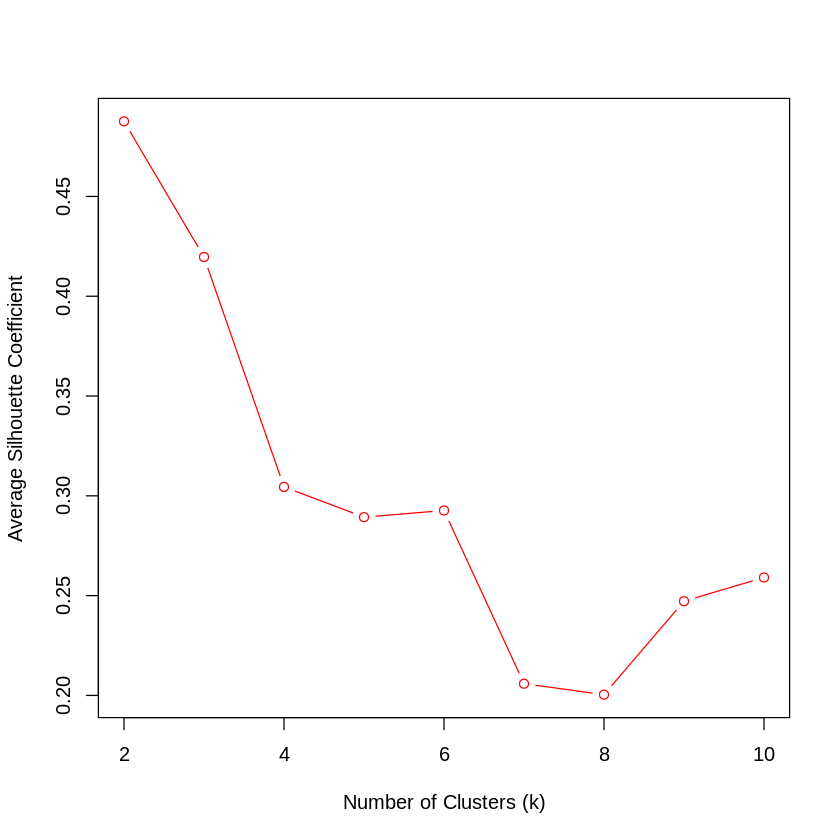

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

# Plot mean silhouette's coefficients
plot(2:10, silhouette_means[2:10], type = "b", xlab = "Number of Clusters (k)",
    ylab = "Average Silhouette Coefficient", col='red')

## **Hierarchical Clustering: Centroid Linkage**

In [ ]:
# Squared of distance matrix
d2 <- distance_matrix^2

hls <- hclust(d2, method = "centroid")

str(hls)

List of 7
 $ merge      : int [1:20152, 1:2] -95 -18820 -18824 -121 -483 -122 -123 -325 -137 -530 ...
 $ height     : num [1:20152] 0 0 0 0 0 0 0 0 0 0 ...
 $ order      : int [1:20153] 18639 4281 15126 5887 9178 4598 4183 11038 13671 14456 ...
 $ labels     : NULL
 $ method     : chr "centroid"
 $ call       : language hclust(d = d2, method = "centroid")
 $ dist.method: NULL
 - attr(*, "class")= chr "hclust"


### Screeplot

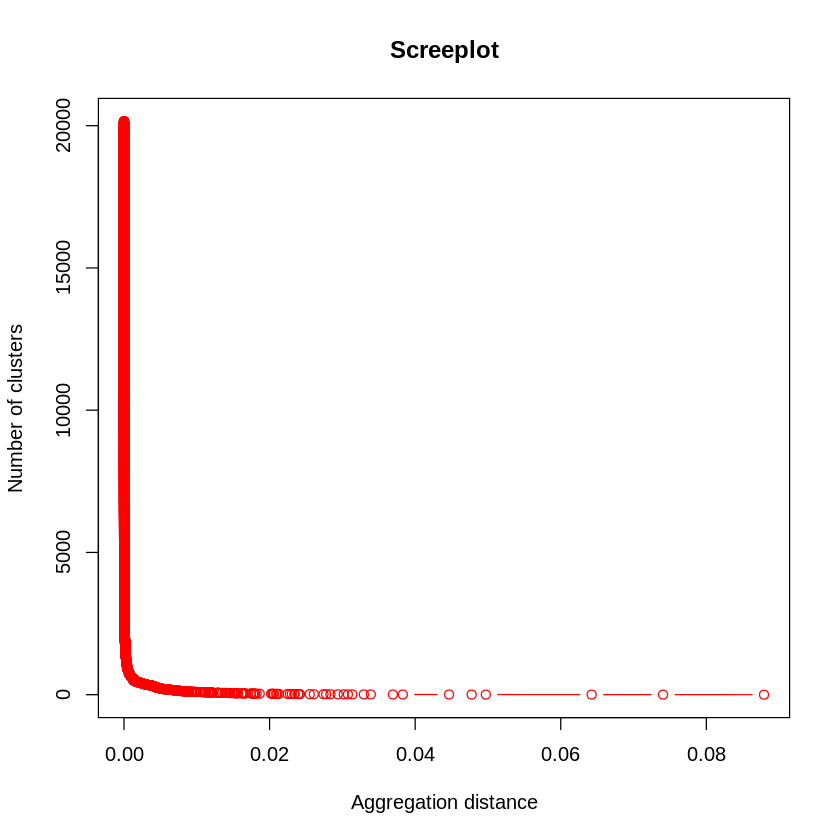

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

plot(c(0, hls$height), seq(20153,1), type = "b", main = "Screeplot",
     xlab = "Aggregation distance", ylab = "Number of clusters",
     col = "red")

### **Cutree:** cut dendograms in two sets

In [ ]:
# Cut dendograms in two sets
cut <- cutree (hls , k = 2, h = NULL)

# Number of elemnts in each cluster
num <- table (cut)

num

cut
    1     2 
 9820 10333 

In [ ]:
# PCA for reduction to 2 dimension
pca <- prcomp(df_X, scale. = FALSE)
data_pca <- pca$x[, 1:2]
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6    PC7
Standard deviation     2.0837 1.4315 1.1835 1.00597 0.98330 0.92153 0.8809
Proportion of Variance 0.3173 0.1497 0.1023 0.07394 0.07065 0.06205 0.0567
Cumulative Proportion  0.3173 0.4670 0.5694 0.64329 0.71394 0.77599 0.8327
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.73732 0.61885 0.57148 0.42843 0.40133 0.38336 0.35632
Proportion of Variance 0.03972 0.02798 0.02386 0.01341 0.01177 0.01074 0.00928
Cumulative Proportion  0.87242 0.90040 0.92426 0.93768 0.94945 0.96018 0.96946
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.32632 0.32019 0.29513 0.27639 0.21001 0.03649
Proportion of Variance 0.00778 0.00749 0.00636 0.00558 0.00322 0.00010
Cumulative Proportion  0.97724 0.98473 0.99110 0.99668 0.99990 1.00000

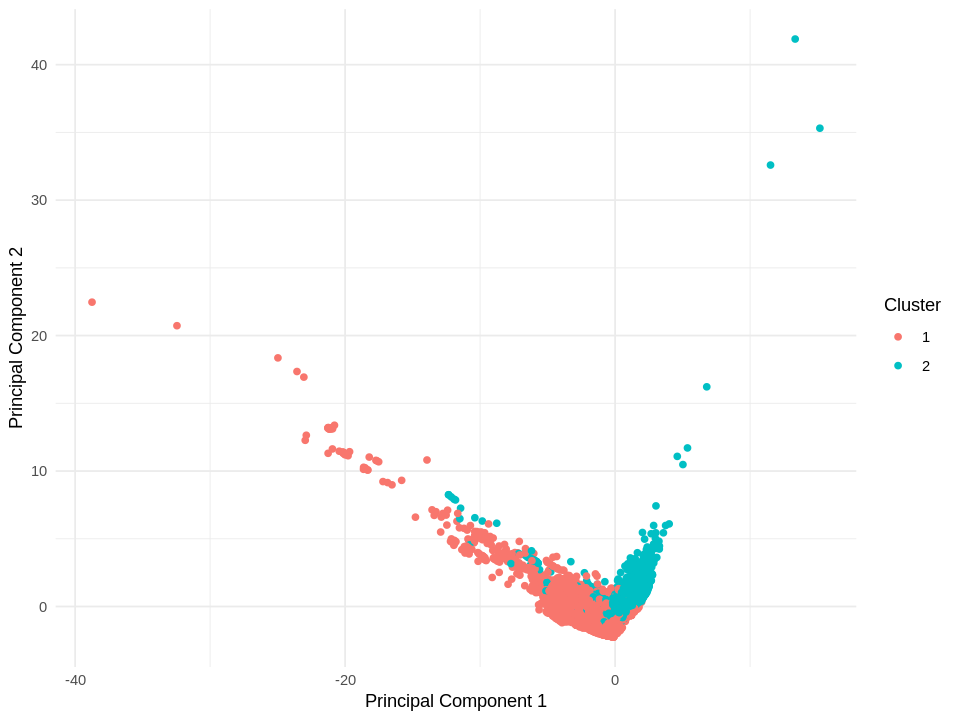

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6)

# Show clusters
plot_df <- data.frame(data_pca, Cluster = factor(cut))
ggplot(plot_df, aes(x = data_pca[,1], y = data_pca[,2], color = Cluster)) +
  geom_point() +
  labs(x = "Principal Component 1", y = "Principal Component 2") +
  theme_minimal()

In [ ]:
# List of labels of clusters
cut_list <- list(cut)

# The sample variance of the data columns is calculated based on cluster labels
agvar <- aggregate(df_X, cut_list, var)[, -1]

# Trace of first cluster
trH1 <-(num [[1]] -1) * sum(agvar [1, ])
if(is.na(trH1))
  trH1 <- 0

# Trace of second cluster
trH2 <-(num [[2]] -1) *sum(agvar [2, ])
if(is.na(trH2))
  trH2 <- 0

# Within
sum <- trH1 + trH2
paste('Within:', sum)

# Between
trB <- trHI - sum
paste('Between', trB/trHI)

[1] "Within: 231723.057449663"

[1] "Between 0.159795400512114"

In [ ]:
# Phishing/Legitimate in each cluster
df_with_cluster <- data.frame(df, Cluster = cut)

cluster_count <- table(df_with_cluster$Cluster, df_with_cluster$label)

colnames(cluster_count) <- c("phishing", "legitimate")

cluster_count

   
    phishing legitimate
  1     9620        200
  2      455       9878

### Silhouette Method

In [ ]:
# List of mean silhouette's coefficients
silhouette_means <- numeric()

for (k in 2:10) {

  cut <- cutree(hls, k = k)

  # Count num of element in each cluster
  num <- table(cut)
  print(num)

  # Silhouette's coefficients
  sil <- silhouette(cut, distance_matrix)

  # Mean silhouette's coefficients
  silhouette_mean <- mean(sil[, 3])
  silhouette_means[k] <- silhouette_mean

  cat("k =", k, "- Silhouette mean:", silhouette_mean, "\n\n")
}

print(silhouette_means[2:10])

cut
    1     2 
 9820 10333 
k = 2 - Silhouette mean: 0.4918804 

cut
    1     2     3 
 9802    18 10333 
k = 3 - Silhouette mean: 0.452724 

cut
    1     2     3     4 
 9802    14 10333     4 
k = 4 - Silhouette mean: 0.4262998 

cut
    1     2     3     4     5 
 9792    14 10333     4    10 
k = 5 - Silhouette mean: 0.3880428 

cut
    1     2     3     4     5     6 
 9761    14 10333    31     4    10 
k = 6 - Silhouette mean: 0.3493044 

cut
    1     2     3     4     5     6     7 
 9760    14 10333    31     4     1    10 
k = 7 - Silhouette mean: 0.2908451 

cut
    1     2     3     4     5     6     7     8 
 9760    14 10330    31     4     3     1    10 
k = 8 - Silhouette mean: 0.2257594 

cut
   1    2    3    4    5    6    7    8    9 
9760   14 7821 2509   31    4    3    1   10 
k = 9 - Silhouette mean: 0.2876649 

cut
   1    2    3    4    5    6    7    8    9   10 
8265   14 1495 7821 2509   31    4    3    1   10 
k = 10 - Silhouette mean: 0.3118772 

[1]

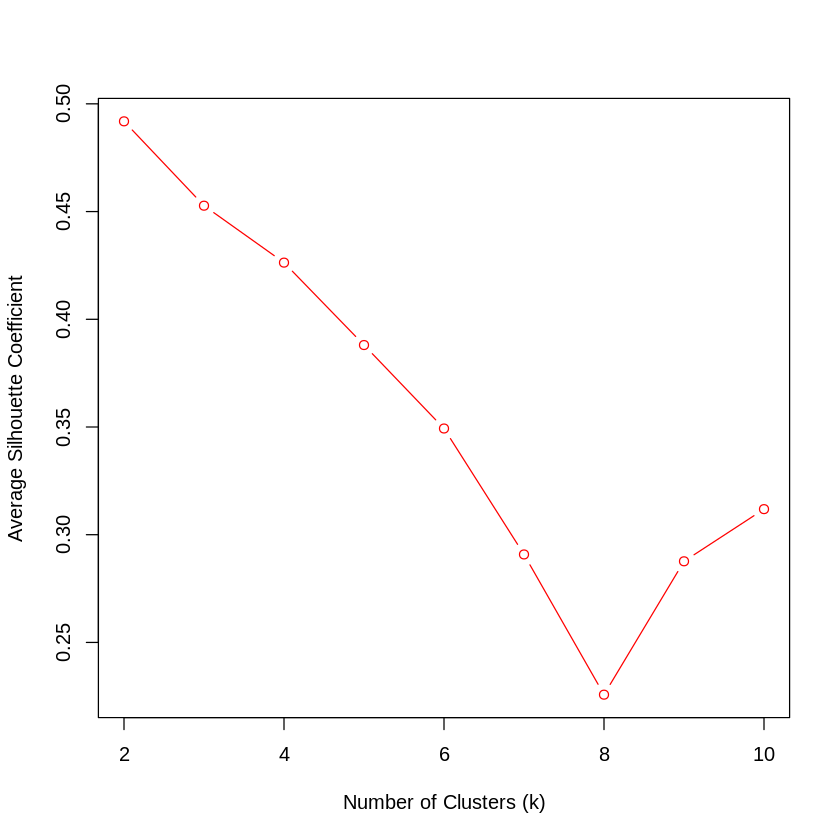

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

# Plot mean silhouette's coefficients
plot(2:10, silhouette_means[2:10], type = "b", xlab = "Number of Clusters (k)",
    ylab = "Average Silhouette Coefficient", col='red')

## **Hierarchical Clustering: Average Linkage**

In [ ]:
hls <- hclust(distance_matrix, method = "average")
str(hls)

List of 7
 $ merge      : int [1:20152, 1:2] -95 -18820 -18824 -121 -483 -122 -123 -325 -137 -530 ...
 $ height     : num [1:20152] 0 0 0 0 0 0 0 0 0 0 ...
 $ order      : int [1:20153] 16204 17353 16861 16953 12764 12787 15249 17862 13341 13393 ...
 $ labels     : NULL
 $ method     : chr "average"
 $ call       : language hclust(d = distance_matrix, method = "average")
 $ dist.method: NULL
 - attr(*, "class")= chr "hclust"


### Screeplot

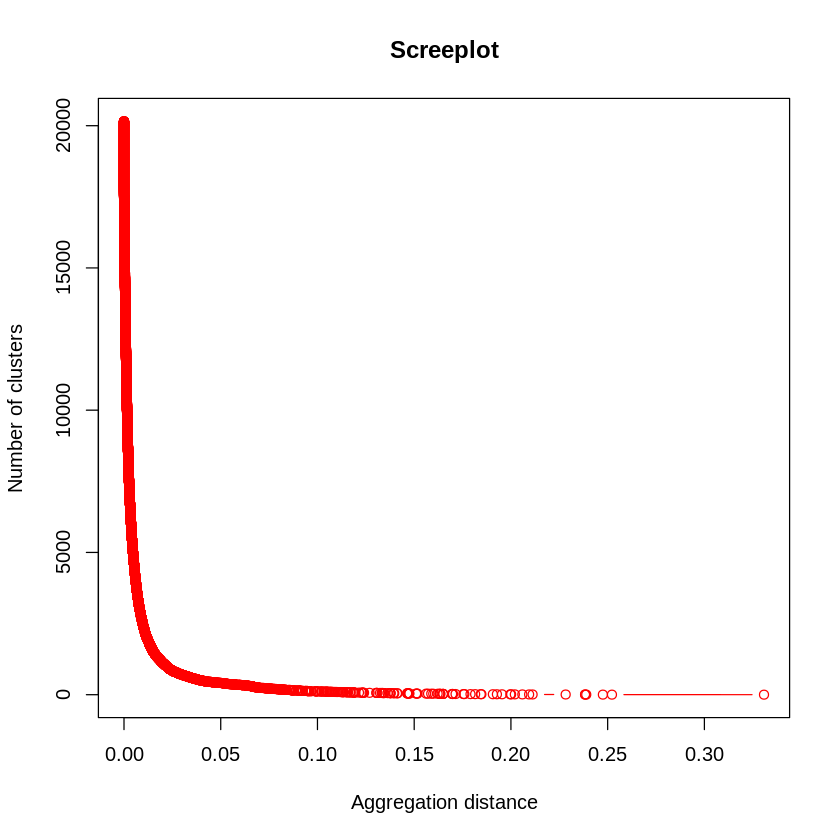

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

plot(c(0, hls$height), seq(20153,1), type = "b", main = "Screeplot",
     xlab = "Aggregation distance", ylab = "Number of clusters",
     col = "red")

### **Cutree:** cut dendograms in two sets

In [ ]:
# Cut dendograms in two sets
cut <- cutree (hls , k = 2, h = NULL)

# Number of elemnts in each cluster
num <- table (cut)

num

cut
    1     2 
 9257 10896 

In [ ]:
# PCA for reduction to 2 dimension
pca <- prcomp(df_X, scale. = FALSE)
data_pca <- pca$x[, 1:2]
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6    PC7
Standard deviation     2.0837 1.4315 1.1835 1.00597 0.98330 0.92153 0.8809
Proportion of Variance 0.3173 0.1497 0.1023 0.07394 0.07065 0.06205 0.0567
Cumulative Proportion  0.3173 0.4670 0.5694 0.64329 0.71394 0.77599 0.8327
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.73732 0.61885 0.57148 0.42843 0.40133 0.38336 0.35632
Proportion of Variance 0.03972 0.02798 0.02386 0.01341 0.01177 0.01074 0.00928
Cumulative Proportion  0.87242 0.90040 0.92426 0.93768 0.94945 0.96018 0.96946
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.32632 0.32019 0.29513 0.27639 0.21001 0.03649
Proportion of Variance 0.00778 0.00749 0.00636 0.00558 0.00322 0.00010
Cumulative Proportion  0.97724 0.98473 0.99110 0.99668 0.99990 1.00000

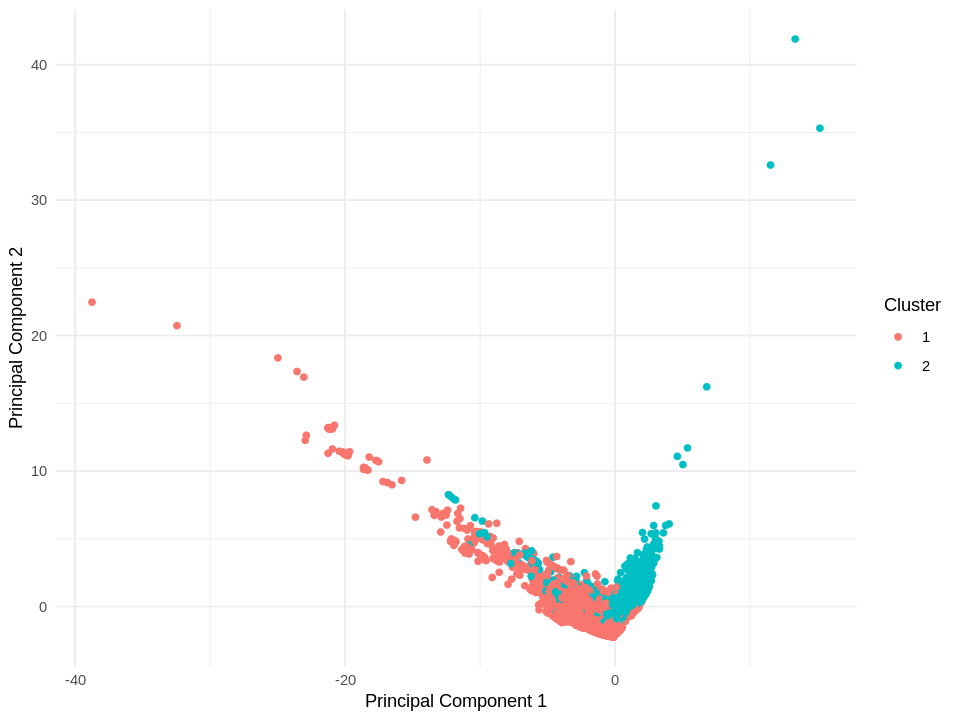

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6)

# Show clusters
plot_df <- data.frame(data_pca, Cluster = factor(cut))
ggplot(plot_df, aes(x = data_pca[,1], y = data_pca[,2], color = Cluster)) +
  geom_point() +
  labs(x = "Principal Component 1", y = "Principal Component 2") +
  theme_minimal()

In [ ]:
# List of labels of clusters
cut_list <- list(cut)

# The sample variance of the data columns is calculated based on cluster labels
agvar <- aggregate(df_X, cut_list, var)[, -1]

# Trace of first cluster
trH1 <-(num [[1]] -1) * sum(agvar [1, ])
if(is.na(trH1))
  trH1 <- 0

# Trace of second cluster
trH2 <-(num [[2]] -1) *sum(agvar [2, ])
if(is.na(trH2))
  trH2 <- 0

# Within
sum <- trH1 + trH2
paste('Within:', sum)

# Between
trB <- trHI - sum
paste('Between', trB/trHI)

[1] "Within: 235727.045198966"

[1] "Between 0.145277341928373"

In [ ]:
# Phishing/Legitimate in each cluster
df_with_cluster <- data.frame(df, Cluster = cut)

cluster_count <- table(df_with_cluster$Cluster, df_with_cluster$label)

colnames(cluster_count) <- c("phishing", "legitimate")

cluster_count

   
    phishing legitimate
  1     9157        100
  2      918       9978

### Silhouette Method

In [ ]:
# List of mean silhouette's coefficients
silhouette_means <- numeric()

for (k in 2:10) {

  cut <- cutree(hls, k = k)

  # Count num of element in each cluster
  num <- table(cut)
  print(num)

  # Silhouette's coefficients
  sil <- silhouette(cut, distance_matrix)

  # Mean silhouette's coefficients
  silhouette_mean <- mean(sil[, 3])
  silhouette_means[k] <- silhouette_mean

  cat("k =", k, "- Silhouette mean:", silhouette_mean, "\n\n")
}

print(silhouette_means[2:10])

cut
    1     2 
 9257 10896 
k = 2 - Silhouette mean: 0.4697987 

cut
    1     2     3 
   53  9204 10896 
k = 3 - Silhouette mean: 0.3926409 

cut
   1    2    3    4 
  53 9204 3138 7758 
k = 4 - Silhouette mean: 0.3900707 

cut
   1    2    3    4    5 
  39 9204 3138 7758   14 
k = 5 - Silhouette mean: 0.3772813 

cut
   1    2    3    4    5    6 
  39 9145 3138 7758   14   59 
k = 6 - Silhouette mean: 0.3469644 

cut
   1    2    3    4    5    6    7 
  39 9121 3138 7758   14   24   59 
k = 7 - Silhouette mean: 0.3220894 

cut
   1    2    3    4    5    6    7    8 
  39 9075   46 3138 7758   14   24   59 
k = 8 - Silhouette mean: 0.3125427 

cut
   1    2    3    4    5    6    7    8    9 
  39 9075   46 3138 7758   14   24   56    3 
k = 9 - Silhouette mean: 0.2989936 

cut
   1    2    3    4    5    6    7    8    9   10 
  36 9075   46 3138 7758   14   24   56    3    3 
k = 10 - Silhouette mean: 0.2965234 

[1] 0.4697987 0.3926409 0.3900707 0.3772813 0.3469644 0.322089

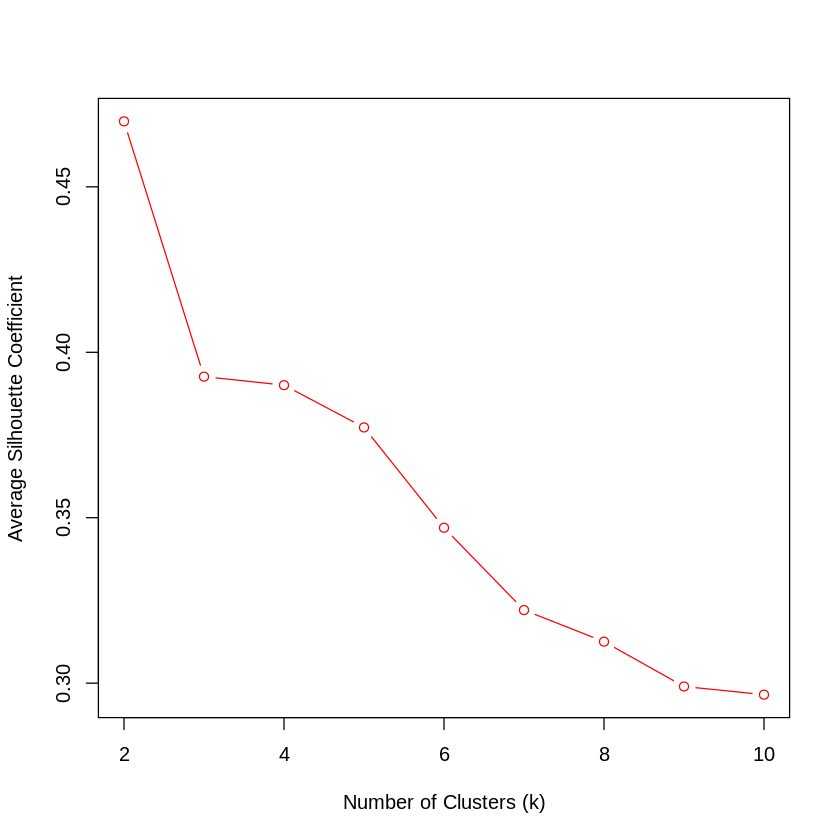

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

# Plot mean silhouette's coefficients
plot(2:10, silhouette_means[2:10], type = "b", xlab = "Number of Clusters (k)",
    ylab = "Average Silhouette Coefficient", col='red')

## **Hierarchical Clustering: Median Linkage**

In [ ]:
# Squared of distance matrix
d2 <- distance_matrix^2

hls <- hclust(d2, method = "median")
str(hls)

List of 7
 $ merge      : int [1:20152, 1:2] -95 -18820 -18824 -121 -483 -122 -123 -325 -137 -530 ...
 $ height     : num [1:20152] 0 0 0 0 0 0 0 0 0 0 ...
 $ order      : int [1:20153] 18639 8036 2810 6992 15135 7 54 37 52 35 ...
 $ labels     : NULL
 $ method     : chr "median"
 $ call       : language hclust(d = d2, method = "median")
 $ dist.method: NULL
 - attr(*, "class")= chr "hclust"


### Screeplot

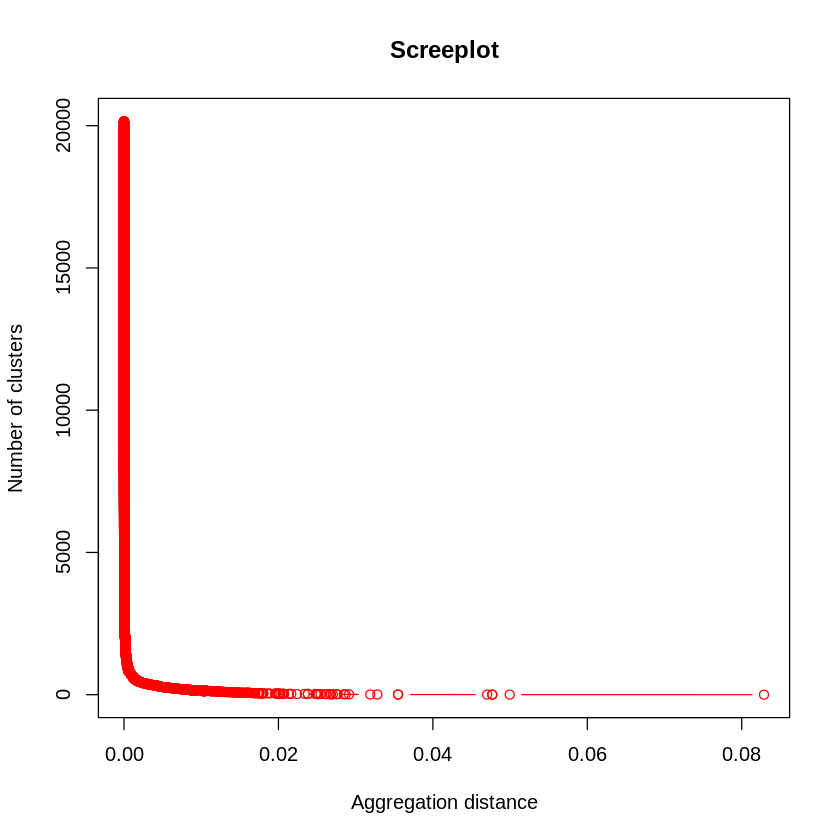

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

plot(c(0, hls$height), seq(20153,1), type = "b", main = "Screeplot",
     xlab = "Aggregation distance", ylab = "Number of clusters",
     col = "red")

### **Cutree:** cut dendograms in two sets

In [ ]:
# Cut dendograms in two sets
cut <- cutree (hls , k = 2, h = NULL)

# Number of elemnts in each cluster
num <- table (cut)

num

cut
    1     2 
10950  9203 

In [ ]:
# PCA for reduction to 2 dimension
pca <- prcomp(df_X, scale. = FALSE)
data_pca <- pca$x[, 1:2]
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6    PC7
Standard deviation     2.0837 1.4315 1.1835 1.00597 0.98330 0.92153 0.8809
Proportion of Variance 0.3173 0.1497 0.1023 0.07394 0.07065 0.06205 0.0567
Cumulative Proportion  0.3173 0.4670 0.5694 0.64329 0.71394 0.77599 0.8327
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.73732 0.61885 0.57148 0.42843 0.40133 0.38336 0.35632
Proportion of Variance 0.03972 0.02798 0.02386 0.01341 0.01177 0.01074 0.00928
Cumulative Proportion  0.87242 0.90040 0.92426 0.93768 0.94945 0.96018 0.96946
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.32632 0.32019 0.29513 0.27639 0.21001 0.03649
Proportion of Variance 0.00778 0.00749 0.00636 0.00558 0.00322 0.00010
Cumulative Proportion  0.97724 0.98473 0.99110 0.99668 0.99990 1.00000

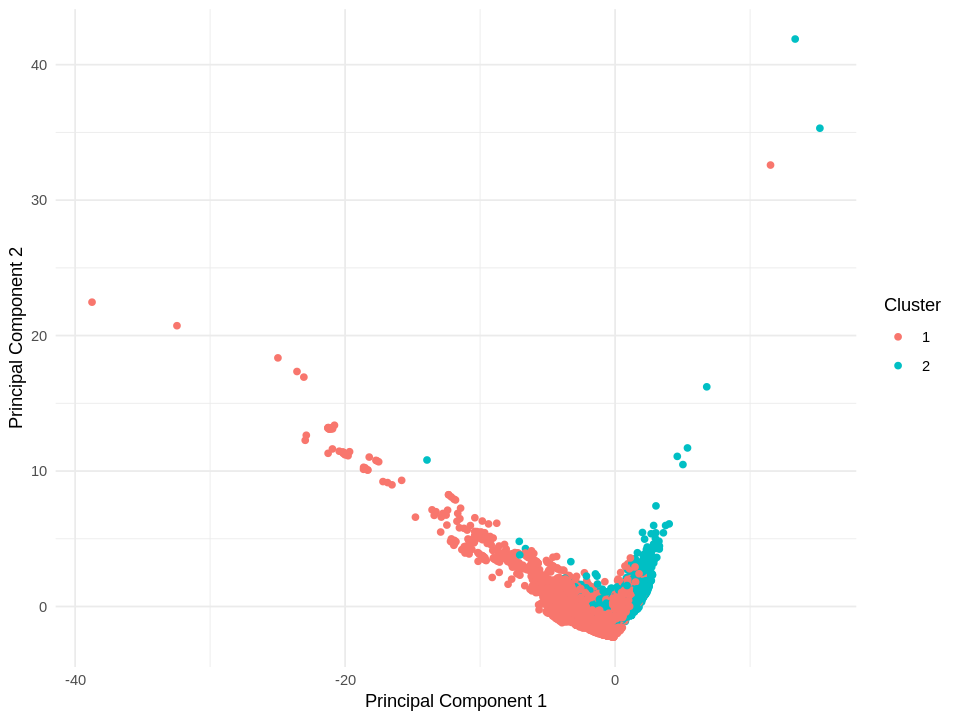

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6)

# Show clusters
plot_df <- data.frame(data_pca, Cluster = factor(cut))
ggplot(plot_df, aes(x = data_pca[,1], y = data_pca[,2], color = Cluster)) +
  geom_point() +
  labs(x = "Principal Component 1", y = "Principal Component 2") +
  theme_minimal()

In [ ]:
# List of labels of clusters
cut_list <- list(cut)

# The sample variance of the data columns is calculated based on cluster labels
agvar <- aggregate(df_X, cut_list, var)[, -1]

# Trace of first cluster
trH1 <-(num [[1]] -1) * sum(agvar [1, ])
if(is.na(trH1))
  trH1 <- 0

# Trace of second cluster
trH2 <-(num [[2]] -1) *sum(agvar [2, ])
if(is.na(trH2))
  trH2 <- 0

# Within
sum <- trH1 + trH2
paste('Within:', sum)

# Between
trB <- trHI - sum
paste('Between', trB/trHI)

[1] "Within: 226135.036186614"

[1] "Between 0.180057005977377"

In [ ]:
# Phishing/Legitimate in each cluster
df_with_cluster <- data.frame(df, Cluster = cut)

cluster_count <- table(df_with_cluster$Cluster, df_with_cluster$label)

colnames(cluster_count) <- c("phishing", "legitimate")

cluster_count

   
    phishing legitimate
  1     8139       2811
  2     1936       7267

### Silhouette Method

In [ ]:
# List of mean silhouette's coefficients
silhouette_means <- numeric()

for (k in 2:10) {

  cut <- cutree(hls, k = k)

  # Count num of element in each cluster
  num <- table(cut)
  print(num)

  # Silhouette's coefficients
  sil <- silhouette(cut, distance_matrix)

  # Mean silhouette's coefficients
  silhouette_mean <- mean(sil[, 3])
  silhouette_means[k] <- silhouette_mean

  cat("k =", k, "- Silhouette mean:", silhouette_mean, "\n\n")
}

print(silhouette_means[2:10])

cut
    1     2 
10950  9203 
k = 2 - Silhouette mean: 0.3854913 

cut
    1     2     3 
10950  9202     1 
k = 3 - Silhouette mean: 0.3025505 

cut
    1     2     3     4 
10946  9202     4     1 
k = 4 - Silhouette mean: 0.2713396 

cut
    1     2     3     4     5 
   30 10916  9202     4     1 
k = 5 - Silhouette mean: 0.1536274 

cut
    1     2     3     4     5     6 
   30 10871    45  9202     4     1 
k = 6 - Silhouette mean: 0.1156083 

cut
   1    2    3    4    5    6    7 
  30 7920   45 9202 2951    4    1 
k = 7 - Silhouette mean: 0.2149569 

cut
   1    2    3    4    5    6    7    8 
  30 7920   45 9202 2951    3    1    1 
k = 8 - Silhouette mean: 0.2068706 

cut
   1    2    3    4    5    6    7    8    9 
  23 7920   45 9202 2951    7    3    1    1 
k = 9 - Silhouette mean: 0.1617391 

cut
   1    2    3    4    5    6    7    8    9   10 
  23 7920   45 4522 2951 4680    7    3    1    1 
k = 10 - Silhouette mean: 0.1873498 

[1] 0.3854913 0.3025505 0.271339

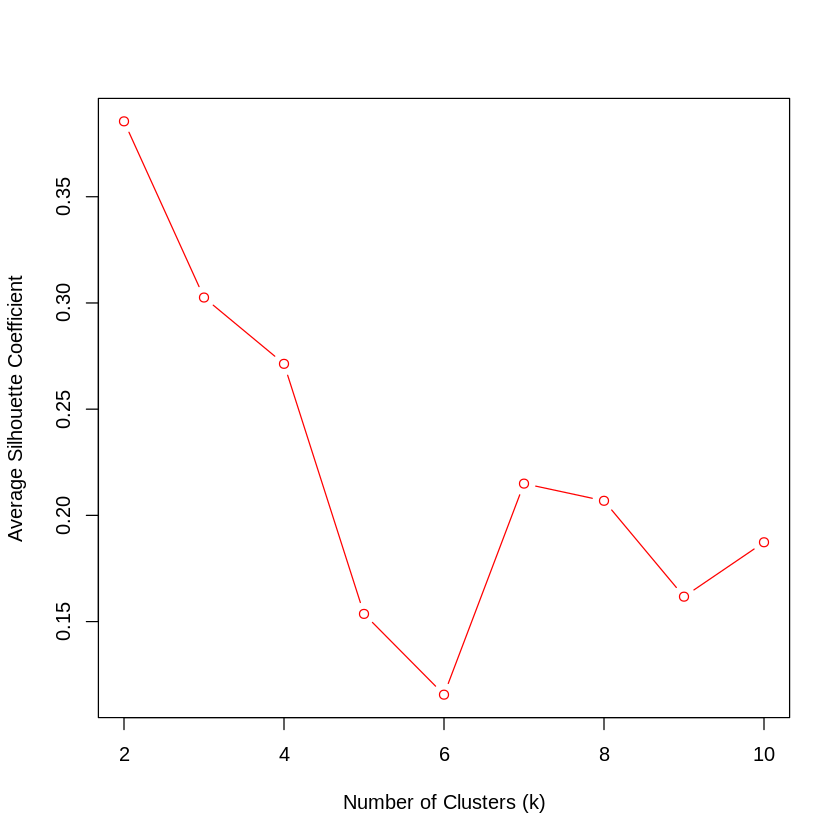

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

# Plot mean silhouette's coefficients
plot(2:10, silhouette_means[2:10], type = "b", xlab = "Number of Clusters (k)",
    ylab = "Average Silhouette Coefficient", col='red')

## **Hierarchical Clustering: Single Linkage**

In [ ]:
hls <- hclust(distance_matrix, method = "single")
str(hls)

List of 7
 $ merge      : int [1:20152, 1:2] -95 -18820 -18824 -121 -483 -122 -123 -325 -137 -530 ...
 $ height     : num [1:20152] 0 0 0 0 0 0 0 0 0 0 ...
 $ order      : int [1:20153] 8036 2810 6992 18639 9135 73 66 67 47 58 ...
 $ labels     : NULL
 $ method     : chr "single"
 $ call       : language hclust(d = distance_matrix, method = "single")
 $ dist.method: NULL
 - attr(*, "class")= chr "hclust"


### Screeplot

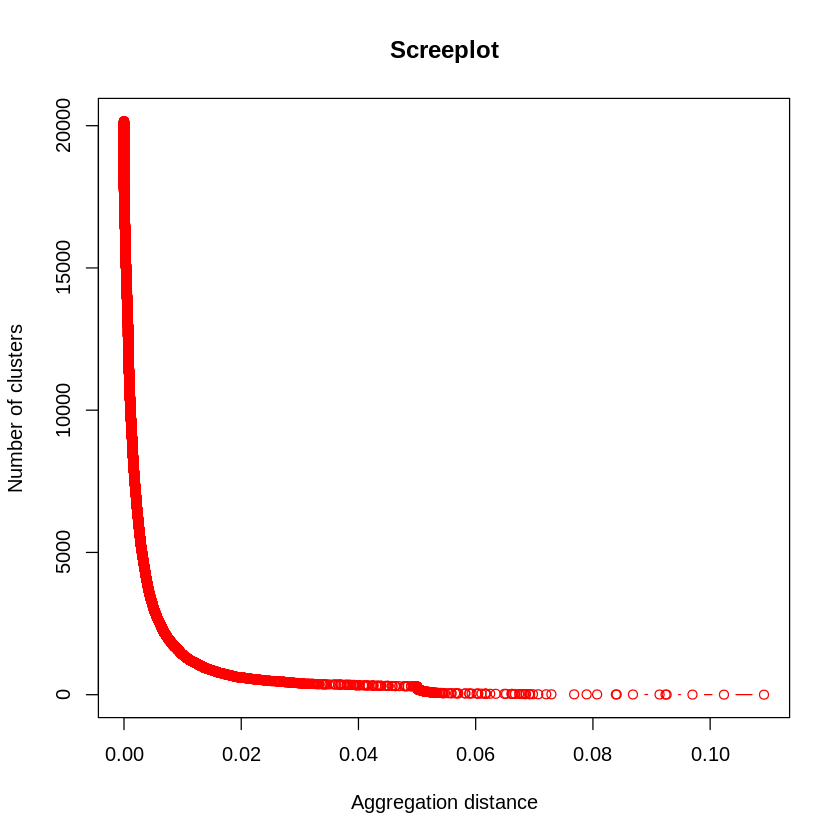

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

plot(c(0, hls$height), seq(20153,1), type = "b", main = "Screeplot",
     xlab = "Aggregation distance", ylab = "Number of clusters",
     col = "red")

### **Cutree:** cut dendograms in two sets

In [ ]:
# Cut dendograms in two sets
cut <- cutree (hls , k = 2, h = NULL)

# Number of elemnts in each cluster
num <- table (cut)

num

cut
    1     2 
20150     3 

In [ ]:
# PCA for reduction to 2 dimension
pca <- prcomp(df_X, scale. = FALSE)
data_pca <- pca$x[, 1:2]
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6    PC7
Standard deviation     2.0837 1.4315 1.1835 1.00597 0.98330 0.92153 0.8809
Proportion of Variance 0.3173 0.1497 0.1023 0.07394 0.07065 0.06205 0.0567
Cumulative Proportion  0.3173 0.4670 0.5694 0.64329 0.71394 0.77599 0.8327
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.73732 0.61885 0.57148 0.42843 0.40133 0.38336 0.35632
Proportion of Variance 0.03972 0.02798 0.02386 0.01341 0.01177 0.01074 0.00928
Cumulative Proportion  0.87242 0.90040 0.92426 0.93768 0.94945 0.96018 0.96946
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.32632 0.32019 0.29513 0.27639 0.21001 0.03649
Proportion of Variance 0.00778 0.00749 0.00636 0.00558 0.00322 0.00010
Cumulative Proportion  0.97724 0.98473 0.99110 0.99668 0.99990 1.00000

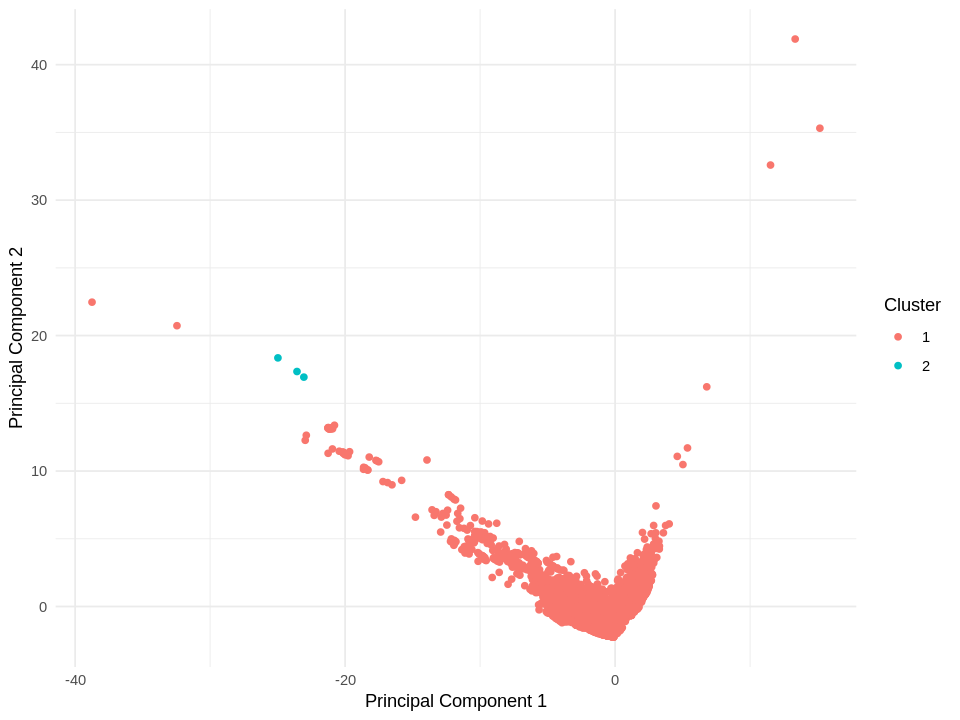

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6)

# Show clusters
plot_df <- data.frame(data_pca, Cluster = factor(cut))
ggplot(plot_df, aes(x = data_pca[,1], y = data_pca[,2], color = Cluster)) +
  geom_point() +
  labs(x = "Principal Component 1", y = "Principal Component 2") +
  theme_minimal()

In [ ]:
# List of labels of clusters
cut_list <- list(cut)

# The sample variance of the data columns is calculated based on cluster labels
agvar <- aggregate(df_X, cut_list, var)[, -1]

# Trace of first cluster
trH1 <-(num [[1]] -1) * sum(agvar [1, ])
if(is.na(trH1))
  trH1 <- 0

# Trace of second cluster
trH2 <-(num [[2]] -1) *sum(agvar [2, ])
if(is.na(trH2))
  trH2 <- 0

# Within
sum <- trH1 + trH2
paste('Within:', sum)

# Between
trB <- trHI - sum
paste('Between', trB/trHI)

[1] "Within: 272617.975921286"

[1] "Between 0.0115145217178071"

In [ ]:
# Phishing/Legitimate in each cluster
df_with_cluster <- data.frame(df, Cluster = cut)

cluster_count <- table(df_with_cluster$Cluster, df_with_cluster$label)

colnames(cluster_count) <- c("phishing", "legitimate")

cluster_count

   
    phishing legitimate
  1    10072      10078
  2        3          0

### Silhouette Method

In [ ]:
# List of mean silhouette's coefficients
silhouette_means <- numeric()

for (k in 2:10) {

  cut <- cutree(hls, k = k)

  # Count num of element in each cluster
  num <- table(cut)
  print(num)

  # Silhouette's coefficients
  sil <- silhouette(cut, distance_matrix)

  # Mean silhouette's coefficients
  silhouette_mean <- mean(sil[, 3])
  silhouette_means[k] <- silhouette_mean

  cat("k =", k, "- Silhouette mean:", silhouette_mean, "\n\n")
}

print(silhouette_means[2:10])

cut
    1     2 
20150     3 
k = 2 - Silhouette mean: 0.2537906 

cut
    1     2     3 
20149     3     1 
k = 3 - Silhouette mean: 0.0651333 

cut
    1     2     3     4 
20137    12     3     1 
k = 4 - Silhouette mean: 0.03872982 

cut
    1     2     3     4     5 
20136    12     1     3     1 
k = 5 - Silhouette mean: -0.009907602 

cut
    1     2     3     4     5     6 
20135    12     1     3     1     1 
k = 6 - Silhouette mean: -0.02778267 

cut
    1     2     3     4     5     6     7 
20134    12     1     3     1     1     1 
k = 7 - Silhouette mean: -0.1092226 

cut
    1     2     3     4     5     6     7     8 
20133    12     1     3     1     1     1     1 
k = 8 - Silhouette mean: -0.1236335 

cut
    1     2     3     4     5     6     7     8     9 
20132    12     1     1     3     1     1     1     1 
k = 9 - Silhouette mean: -0.1446014 

cut
    1     2     3     4     5     6     7     8     9    10 
20131    12     1     1     3     1     1     1     1 

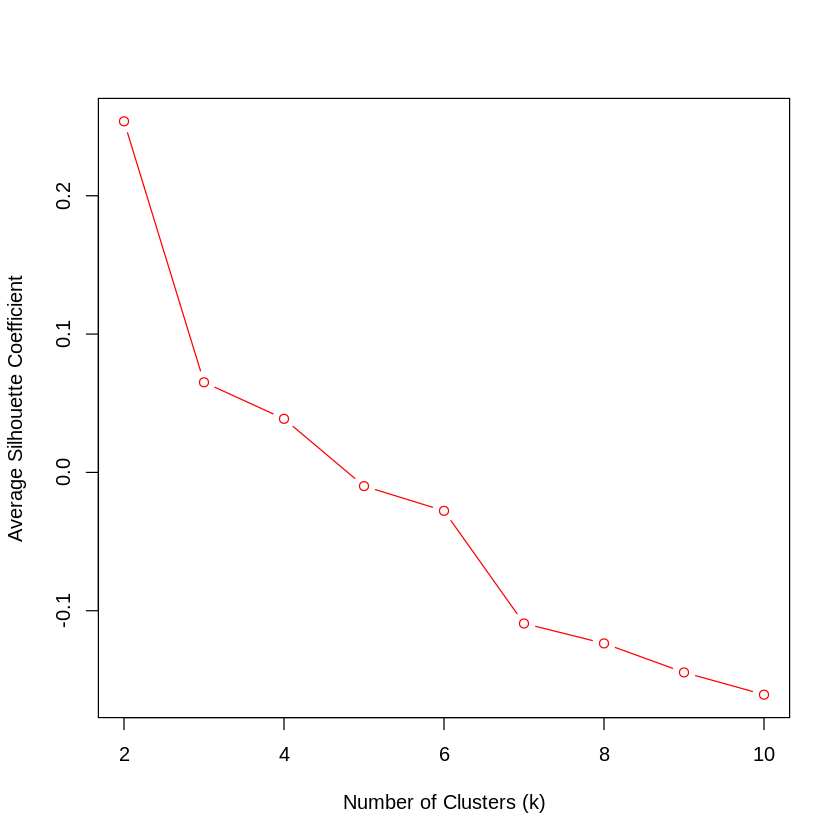

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

# Plot mean silhouette's coefficients
plot(2:10, silhouette_means[2:10], type = "b", xlab = "Number of Clusters (k)",
    ylab = "Average Silhouette Coefficient", col='red')

## **K-Means: hierarchical clustering initialization**

In [35]:
d2 = distance_matrix ^ 2

hls <- hclust(d2, method = "centroid")
cut <- cutree(hls, k = 2)

cut_list <- list(cut)

# Centroids
centroids <- aggregate(df_X, cut_list, mean)
centroids <- centroids[, -1]

In [36]:
# k-means
km <- kmeans (df_X, centers = centroids, iter.max = 100)

In [15]:
# Calculate the statistical heterogeneity measure
print(paste("Statistical heterogeneity measure: ", km$betweenss / km$totss))

# Calculate the total heterogeneity measure
print(paste("Total heterogeneity measure: ", km$totss))

# Calculate the sum of the within-cluster variance
print(paste("Sum of within-cluster variance: ", km$tot.withinss))

# Calculate the between-cluster variance
print(paste("Between-cluster variance: ", km$betweenss))

[1] "Statistical heterogeneity measure:  0.212901652560165"
[1] "Total heterogeneity measure:  280795.371210242"
[1] "Sum of within-cluster variance:  221013.572648337"
[1] "Between-cluster variance:  59781.7985619055"


In [16]:
df_X$cluster <- km$cluster

# Create a contingency table between the cluster and the label
contingency_table <- table(df_X$cluster, df$label)

# Rename columns
colnames(contingency_table) <- c("phishing", "legitimate")

print("Contingency table between cluster and label:")
print(contingency_table)

[1] "Contingency table between cluster and label:"
   
    phishing legitimate
  1     8471       2463
  2     1604       7615


In [ ]:
# PCA for reduction to 2 dimension
pca <- prcomp(df_X[, -ncol(df_X)], scale. = FALSE)
data_pca <- pca$x[, 1:2]
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6    PC7
Standard deviation     2.0837 1.4315 1.1835 1.00597 0.98330 0.92153 0.8809
Proportion of Variance 0.3173 0.1497 0.1023 0.07394 0.07065 0.06205 0.0567
Cumulative Proportion  0.3173 0.4670 0.5694 0.64329 0.71394 0.77599 0.8327
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.73732 0.61885 0.57148 0.42843 0.40133 0.38336 0.35632
Proportion of Variance 0.03972 0.02798 0.02386 0.01341 0.01177 0.01074 0.00928
Cumulative Proportion  0.87242 0.90040 0.92426 0.93768 0.94945 0.96018 0.96946
                          PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     0.32632 0.32019 0.29513 0.27639 0.21001 0.03649
Proportion of Variance 0.00778 0.00749 0.00636 0.00558 0.00322 0.00010
Cumulative Proportion  0.97724 0.98473 0.99110 0.99668 0.99990 1.00000

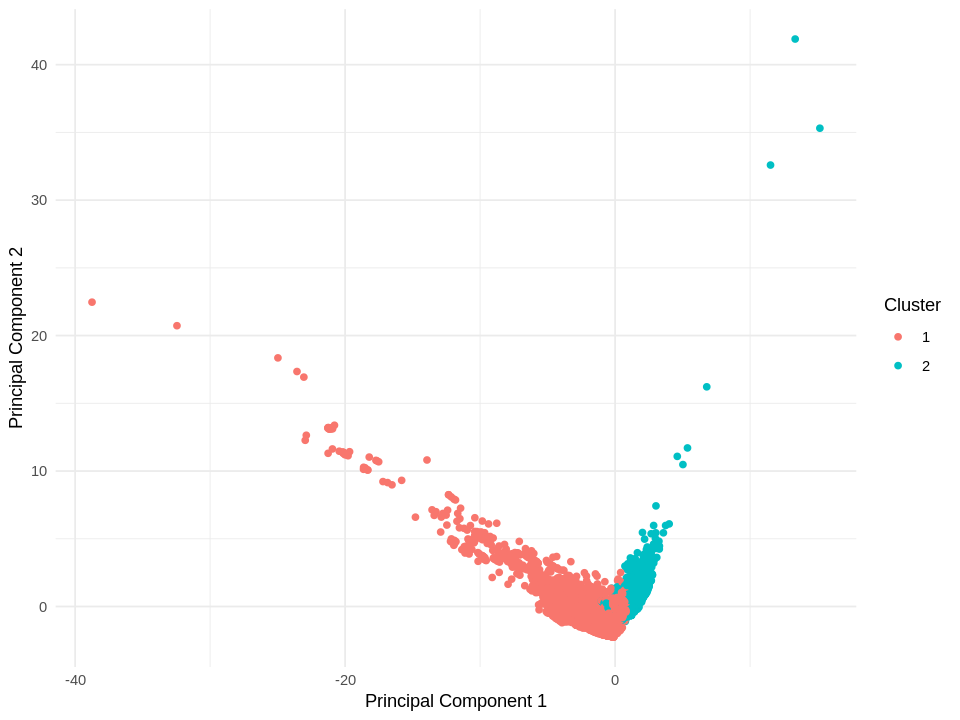

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6)

# Show clusters
plot_df <- data.frame(data_pca, Cluster = factor(km$cluster))
ggplot(plot_df, aes(x = data_pca[,1], y = data_pca[,2], color = Cluster)) +
  geom_point() +
  labs(x = "Principal Component 1", y = "Principal Component 2") +
  theme_minimal()

### Silhouette Method

In [38]:
# List of mean silhouette's coefficients
silhouette_means <- numeric()


for (k in 2:10) {

  # Perform K-Means clustering with 'k' clusters
  if (k == 2) {
    km <- kmeans(df_X, centers = centroids, iter.max = 100)
    wss_values[k] <- km$tot.withinss
  }
  else {
    km <- kmeans(df_X, centers = k, nstart = 25, iter.max = 100)
    wss_values[k] <- km$tot.withinss
  }

  clusters <- km$cluster

  # Count num of element in each cluster
  num <- table(clusters)
  print(num)

  # Mean silhouette's coefficients
  sil <- silhouette(clusters, distance_matrix)

  silhouette_mean <- mean(sil[, 3])
  silhouette_means[k] <- silhouette_mean

  cat("k =", k, "- Silhouette mean:", silhouette_mean, "\n\n")
}

# Print the mean silhouette scores for k = 2 to 10
print(silhouette_means[2:10])

clusters
    1     2 
10934  9219 
k = 2 - Silhouette mean: 0.4231209 

clusters
    1     2     3 
10721  9171   261 
k = 3 - Silhouette mean: 0.2708202 

clusters
    1     2     3     4 
 9169   261     2 10721 
k = 4 - Silhouette mean: 0.1377932 

clusters
   1    2    3    4    5 
 203  468 9024 3456 7002 
k = 5 - Silhouette mean: 0.1942045 

clusters
   1    2    3    4    5    6 
2993    2 9092  488  228 7350 
k = 6 - Silhouette mean: 0.2121923 

clusters
   1    2    3    4    5    6    7 
 202 2181  456 3300    2 6733 7279 
k = 7 - Silhouette mean: 0.1471534 

clusters
   1    2    3    4    5    6    7    8 
6733    1 3301    2 7278 2180  456  202 
k = 8 - Silhouette mean: 0.09142784 

clusters
   1    2    3    4    5    6    7    8    9 
2453 5158  450 7279    2 2413    1  195 2202 
k = 9 - Silhouette mean: 0.1759159 

clusters
   1    2    3    4    5    6    7    8    9   10 
2575    1  444 2041 5450 2212 7156   47    2  225 
k = 10 - Silhouette mean: 0.0774524 

[1] 0.42

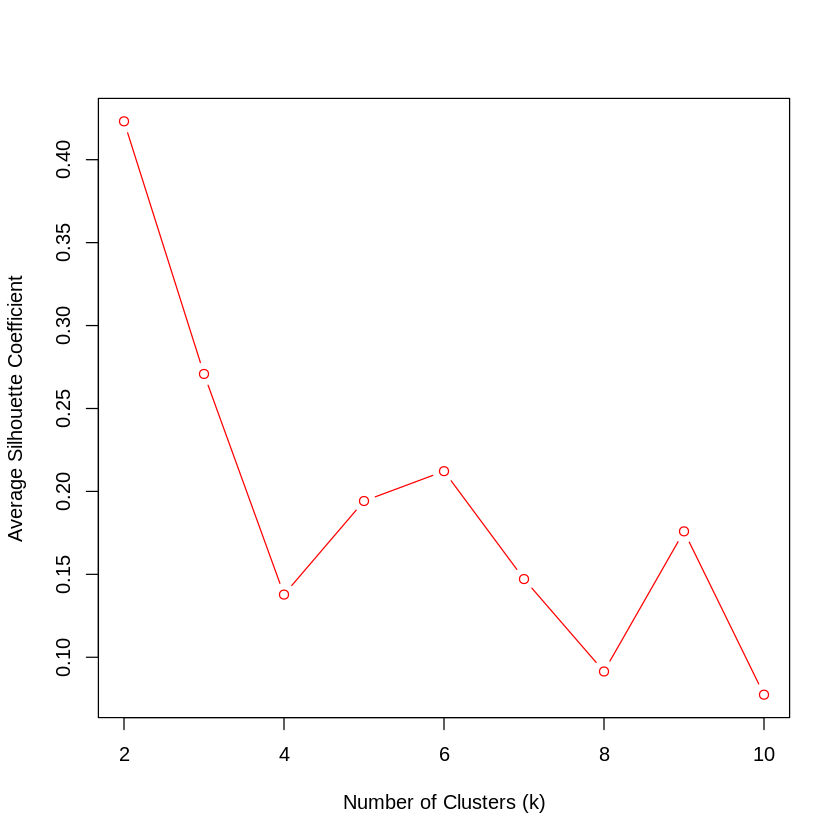

In [39]:
options(repr.plot.width = 7, repr.plot.height = 7)

# Plot mean silhouette's coefficients
plot(2:10, silhouette_means[2:10], type = "b", xlab = "Number of Clusters (k)",
    ylab = "Average Silhouette Coefficient", col='red')

### Elbow-point

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 1007650)”


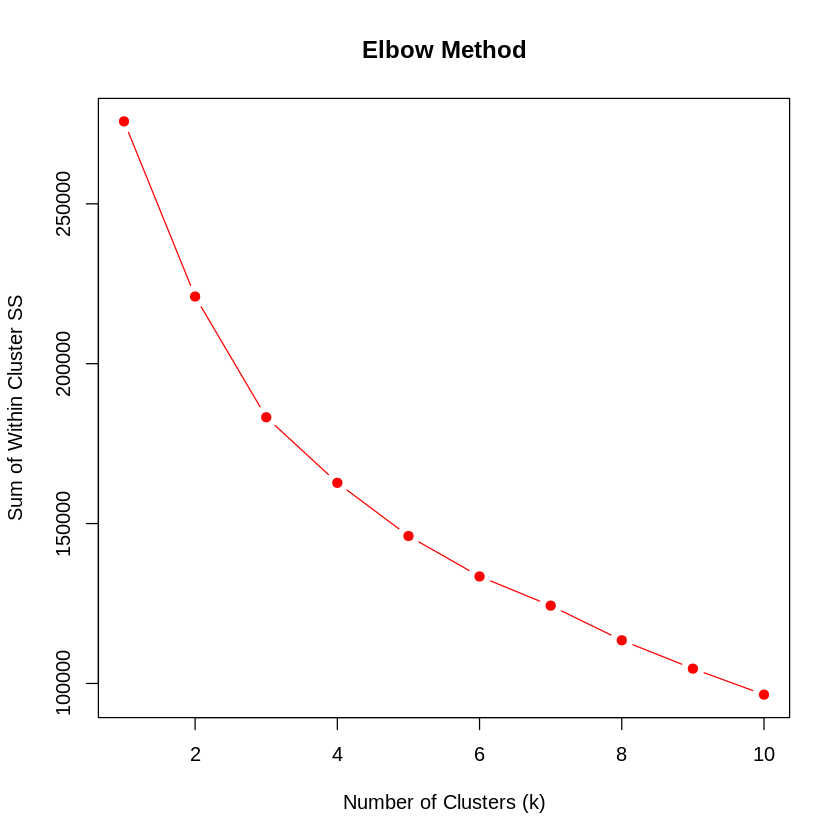

In [37]:
k_values <- 1:10

# Vector to store the WSS for each k
wss_values <- numeric(length(k_values))

# Calculate K-means for each k value
for (k in k_values) {
  if (k == 2) {
    km <- kmeans(df_X, centers = centroids, iter.max = 100)
    wss_values[k] <- km$tot.withinss
  }
  else {
    km <- kmeans(df_X, centers = k, nstart = 25, iter.max = 100)
    wss_values[k] <- km$tot.withinss
  }
}

# Plot the Elbow Method graph
plot(k_values, wss_values, type = "b", pch = 19, col = "red",
     xlab = "Number of Clusters (k)", ylab = "Sum of Within Cluster SS",
     main = "Elbow Method")